In [1]:
# import ipympl

In [2]:
import pandas as pd
import pylab as plt
import numpy as np

In [3]:
data = pd.read_csv('meting-david-linker-rechterhand.txt', sep='\t', decimal=',', names=['frequency', 'amplitude', 'phase'])

In [4]:
data['Z'] = 275 * 10 ** (data.amplitude / 20)

In [5]:
data.head()

,frequency,amplitude,phase,Z
0,5.000,11.030,-5.282,979.112723
1,6.000,10.026,-5.609,872.233362
2,7.200,9.605,-5.935,830.964927
3,8.640,9.594,-6.578,829.913241
4,10.368,9.440,-7.258,815.328632


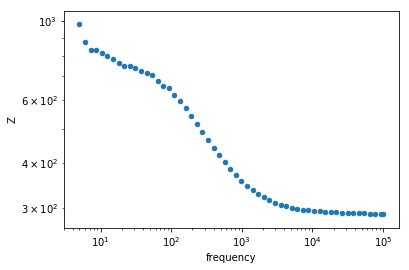

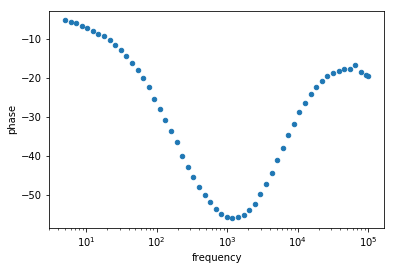

In [6]:
data.plot.scatter('frequency', 'Z', loglog=True)
data.plot.scatter('frequency', 'phase', logx=True)
plt.show()

In [7]:
from lmfit.models import Model

In [8]:
from numpy import pi, sqrt, arctan

In [9]:
Z = Model(lambda f, Re, Ri, C: Re*sqrt((1+C**2*Ri**2*4*pi**2*f**2)/(1+C**2*(Re+Ri)**2*4*pi**2*f**2)))

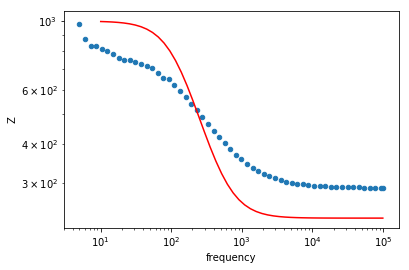

In [10]:
f = np.logspace(1, 5)
y = Z.eval(f=f, Re=1000, Ri=300, C=1e-6)
data.plot.scatter('frequency', 'Z', loglog=True)
plt.plot(f, y, 'r-')
plt.show()

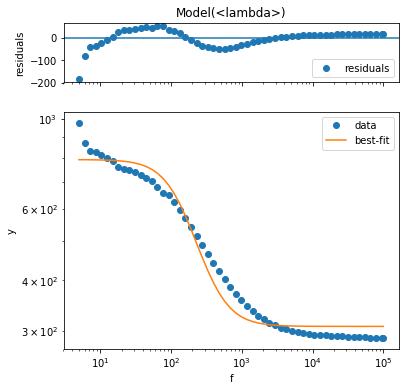

In [11]:
guess = Z.make_params(Re=1000, Ri=300, C=1e-6)
Z_result = Z.fit(data.Z, f=data.frequency, params=guess)
Z_result.plot(ax_fit_kws=dict(xscale='log', yscale='log')); plt.show()

In [12]:
print(Z_result.fit_report())

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 56
    # variables        = 3
    chi-square         = 85675.3970
    reduced chi-square = 1616.51692
    Akaike info crit   = 416.646280
    Bayesian info crit = 422.722335
[[Variables]]
    Re:  793.634092 +/- 11.2093412 (1.41%) (init = 1000)
    Ri:  503.619503 +/- 20.4056142 (4.05%) (init = 300)
    C:   8.6058e-07 +/- 6.1380e-08 (7.13%) (init = 1e-06)
[[Correlations]] (unreported correlations are < 0.100)
    C(Re, C)  =  0.479
    C(Re, Ri) = -0.157



In [13]:
phi = Model(lambda f, Re, Ri, C: (180/pi)*(arctan(Ri*C*2*pi*f)-arctan((Ri+Re)*C*2*pi*f)))

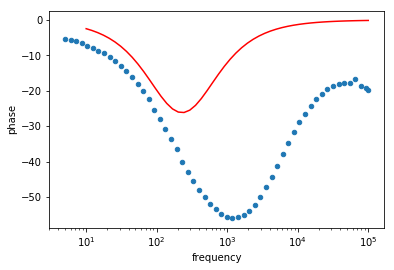

In [14]:
f = np.logspace(1, 5)
y = phi.eval(f=f, params=Z_result.params)
data.plot.scatter('frequency', 'phase', logx=True)
plt.plot(f, y, 'r-')
plt.show()

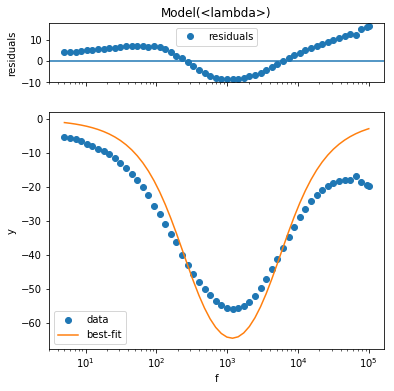

In [15]:
guess = Z_result.params
# guess['Re'].vary = False
phi_result = phi.fit(data.phase, f=data.frequency, params=guess)
phi_result.plot(ax_fit_kws=dict(xscale='log')); plt.show()

In [16]:
print(phi_result.fit_report())

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 64
    # data points      = 56
    # variables        = 3
    chi-square         = 3128.84404
    reduced chi-square = 59.0347932
    Akaike info crit   = 231.291764
    Bayesian info crit = 237.367819
[[Variables]]
    Re:  1606.21089 +/- 3.6263e+09 (225769653.72%) (init = 793.6341)
    Ri:  86.4393764 +/- 1.9515e+08 (225769101.63%) (init = 503.6195)
    C:   3.5405e-07 +/- 0.79454244 (224414587.27%) (init = 8.605835e-07)
[[Correlations]] (unreported correlations are < 0.100)
    C(Re, C)  = -1.000
    C(Ri, C)  = -1.000
    C(Re, Ri) =  1.000



In [17]:
data

,frequency,amplitude,phase,Z
0,5.000,11.030,-5.282,979.112723
1,6.000,10.026,-5.609,872.233362
2,7.200,9.605,-5.935,830.964927
3,8.640,9.594,-6.578,829.913241
4,10.368,9.440,-7.258,815.328632
5,12.442,9.263,-7.937,798.882106
6,14.930,9.112,-8.871,785.113950
7,17.916,8.860,-9.373,762.663029
8,21.499,8.724,-10.373,750.814574
9,25.799,8.678,-11.597,746.848811
